# Predicting Diabetes Risk Using Machine Learning

## My Learning Journey in Healthcare Analytics

I wanted to understand how computers can help doctors find people who might get diabetes before they actually get sick. As I learned from the International Diabetes Federation report, over 463 million people around the world have diabetes, and it costs a lot of money to treat them. My goal was to build computer models that can look at health information and predict who might get diabetes so doctors can help them early.

I used a big dataset from the CDC called BRFSS that has information from 253,680 people. This dataset has 21 different things about each person like their weight, age, and if they exercise. I wanted to try both old-style machine learning methods and newer deep learning methods to see which one works better for predicting diabetes.

## Install libraries

First, I need to load all the libraries I will use. I need pandas to read my data, matplotlib to make charts, and TensorFlow to build my smart prediction models. I also set a random seed number so that every time I run my code, I get the same results.

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn for traditional ML
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, auc, precision_recall_curve)

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# TensorFlow and Keras for Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

## Looking at My Data

I loaded my diabetes dataset from the CDC. The data has a special column called Diabetes_012 that tells me if someone has diabetes or not. The numbers mean: 0 is healthy, 1 is prediabetes, and 2 is diabetes. I decided to make it simpler by grouping prediabetes and diabetes together, so now it's just healthy or not healthy.

In [2]:
# Load the dataset
df = pd.read_csv('datasets/diabetes.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (253680, 22)

Column Names:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

First 5 rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Dataset information
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 no

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


I need to count how many people in my data are healthy and how many have diabetes. This is important because if I have way more healthy people than sick people, my model might just guess everyone is healthy. I need to know this so I can handle it properly later.

Target Variable Distribution:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Percentage Distribution:
Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64


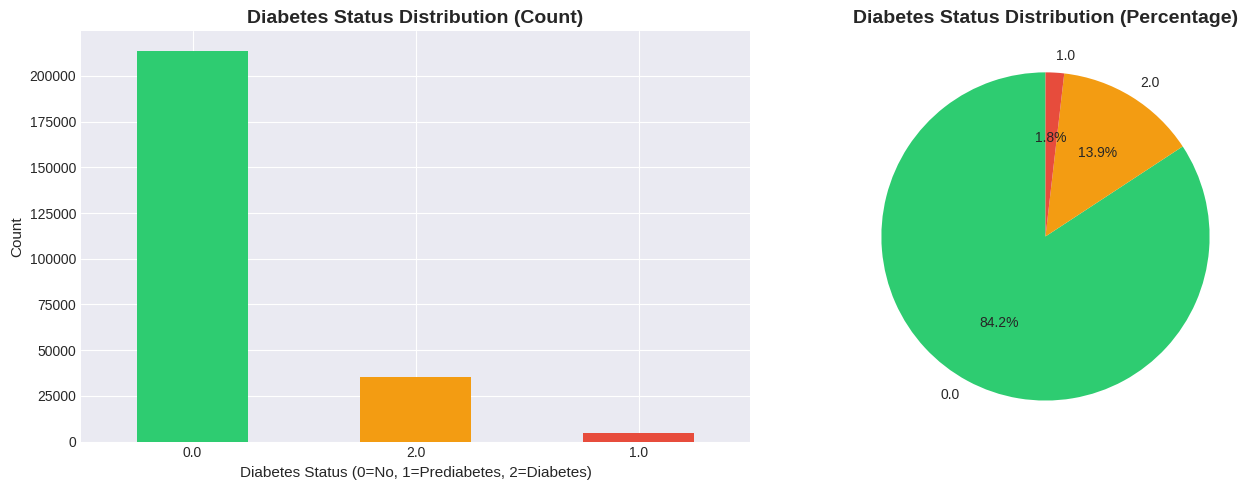

In [4]:
# Analyze target variable distribution
print("Target Variable Distribution:")
print(df['Diabetes_012'].value_counts())
print("\nPercentage Distribution:")
print(df['Diabetes_012'].value_counts(normalize=True) * 100)

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Diabetes_012'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_title('Diabetes Status Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diabetes Status (0=No, 1=Prediabetes, 2=Diabetes)', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
colors = ['#2ecc71', '#f39c12', '#e74c3c']
df['Diabetes_012'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                       colors=colors, startangle=90)
axes[1].set_title('Diabetes Status Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

I changed my target to just two groups: people without diabetes (0) and people with diabetes or prediabetes (1). I read in medical books that both prediabetes and diabetes need doctor's help, so it makes sense to group them together. This makes my prediction problem simpler to solve.

Binary Target Distribution:
Diabetes_Binary
0    213703
1     39977
Name: count, dtype: int64

Percentage:
Diabetes_Binary
0    84.24117
1    15.75883
Name: proportion, dtype: float64


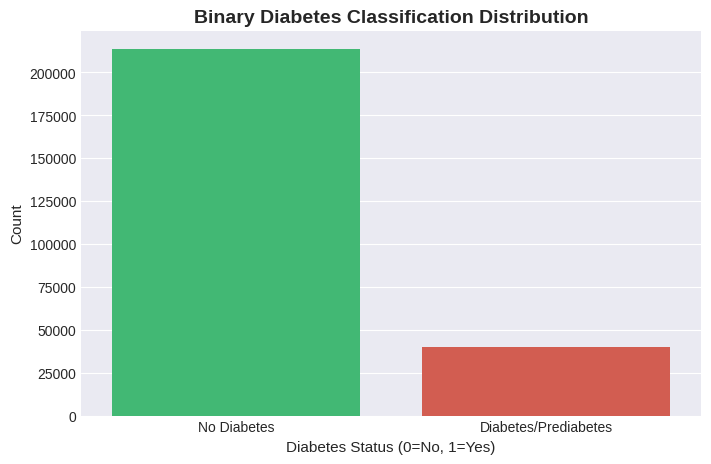


Class Imbalance Ratio: 5.35:1 (Negative:Positive)


In [5]:
# Convert to binary classification: 0 = No Diabetes, 1 = Prediabetes or Diabetes
df['Diabetes_Binary'] = (df['Diabetes_012'] > 0).astype(int)

print("Binary Target Distribution:")
print(df['Diabetes_Binary'].value_counts())
print("\nPercentage:")
print(df['Diabetes_Binary'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_Binary', data=df, palette=['#2ecc71', '#e74c3c'])
plt.title('Binary Diabetes Classification Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes/Prediabetes'])
plt.show()

# Calculate class imbalance ratio
imbalance_ratio = df['Diabetes_Binary'].value_counts()[0] / df['Diabetes_Binary'].value_counts()[1]
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1 (Negative:Positive)")


## Exploring My Data

Looking for Missing Information

I checked if any information is missing in my dataset. Sometimes people don't answer all questions in surveys, and that can mess up my predictions. I need to find these gaps and decide what to do about them.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing_Count', ascending=False)

print("Missing Values Analysis:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\nExcellent: No missing values detected in the dataset.")
else:
    print("\n⚠ Missing values detected. Will require imputation strategy.")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Excellent: No missing values detected in the dataset.


Let's look at different health measurements to see how they differ between healthy people and people with diabetes. I compared their weights, ages, and activity levels. This helps me understand which things are most different and might be good clues for predicting diabetes.

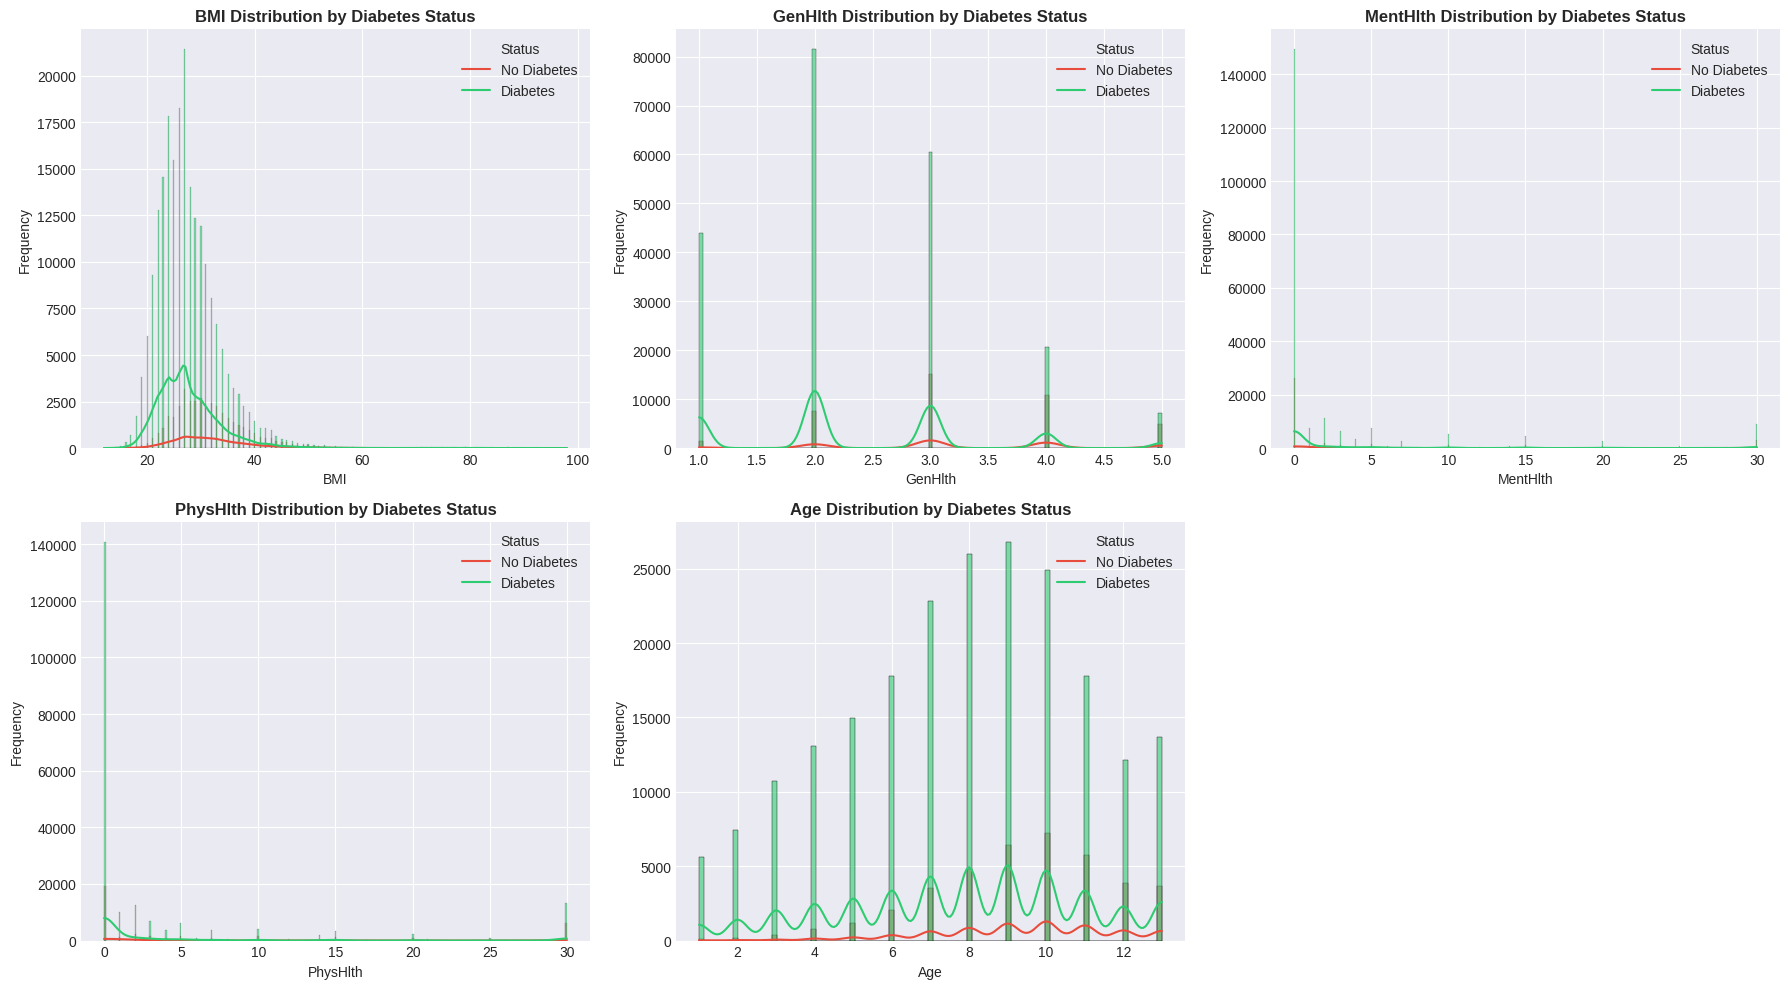

In [7]:
# Select key continuous/ordinal features for visualization
key_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.histplot(data=df, x=feature, hue='Diabetes_Binary', kde=True,
                 ax=axes[idx], palette=['#2ecc71', '#e74c3c'], alpha=0.6)
    axes[idx].set_title(f'{feature} Distribution by Diabetes Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend(['No Diabetes', 'Diabetes'], title='Status')

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

I made a chart to see which health factors are connected to each other. For example, if people with high blood pressure also tend to have high cholesterol, those two things are connected. Understanding these connections helps me pick the best information to use in my model.

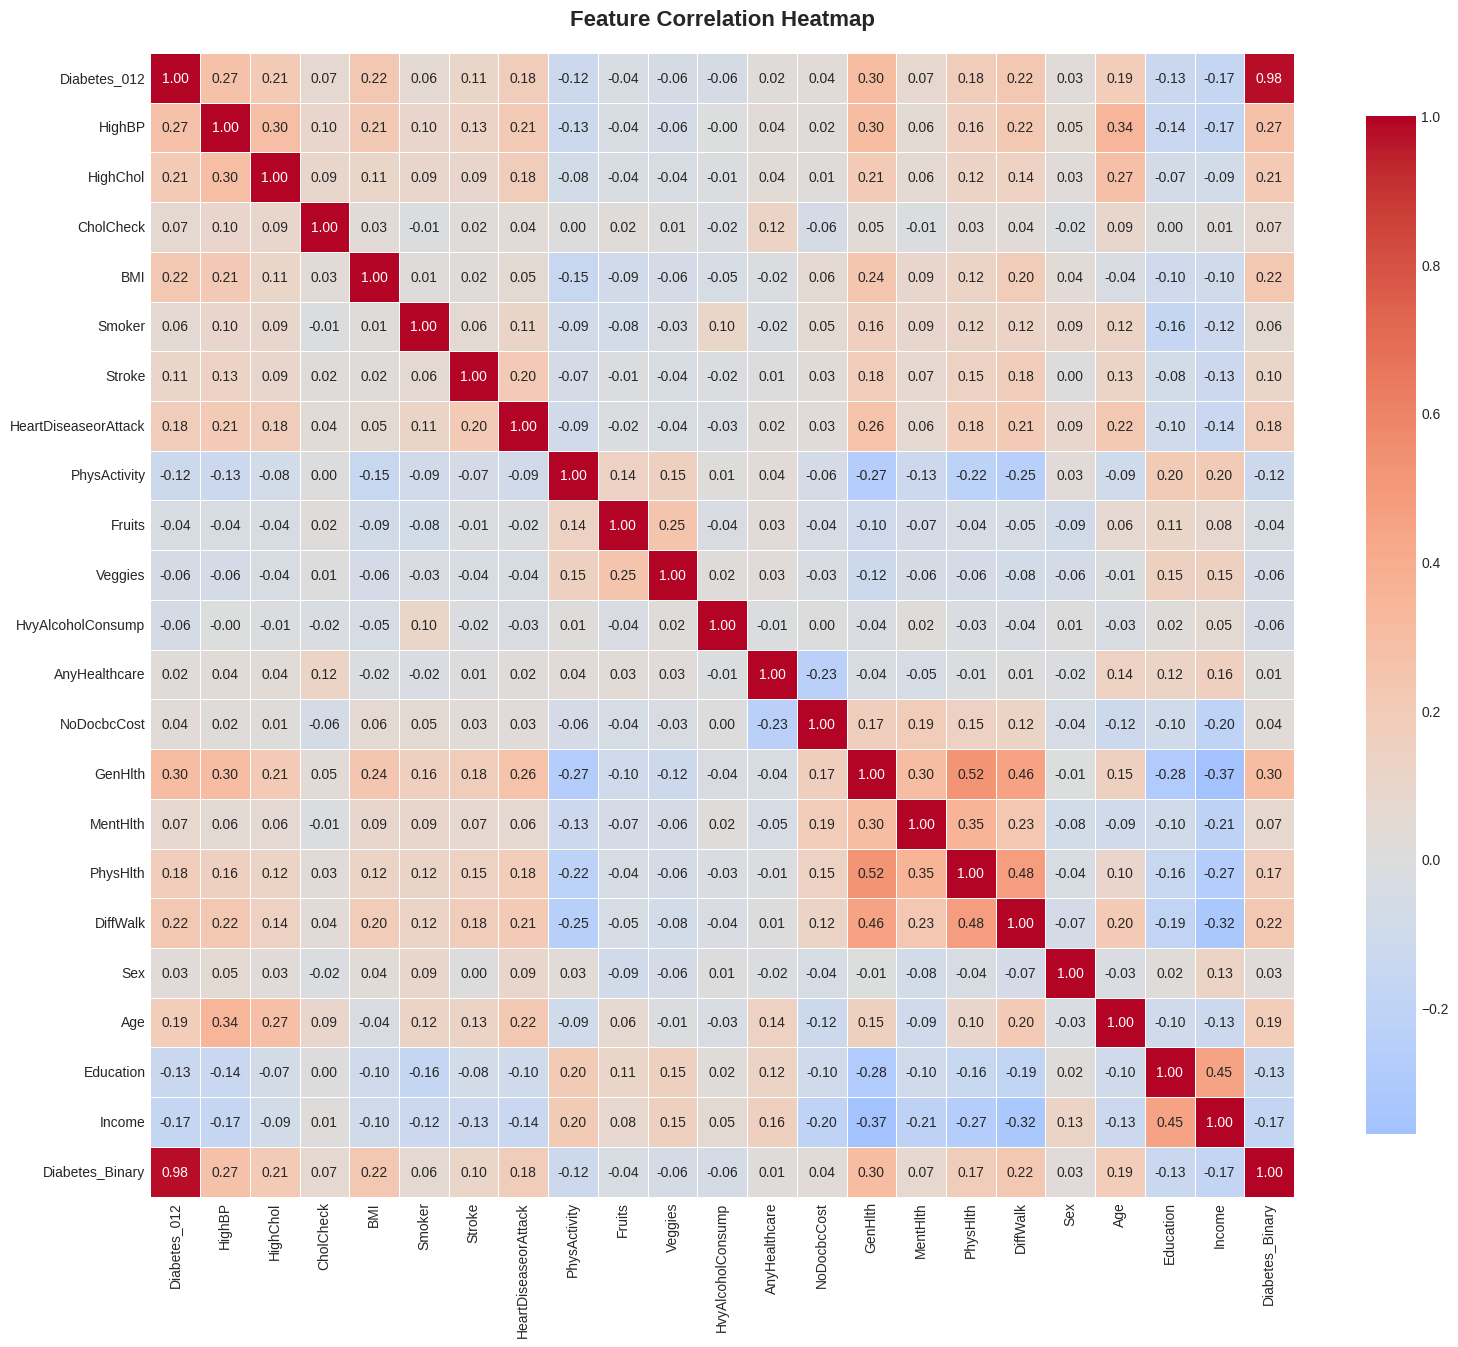

Diabetes_012            0.983304
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Stroke                  0.104800
Name: Diabetes_Binary, dtype: float64
Top predictive features based on correlation:
  - Diabetes_012: 0.983
  - GenHlth: 0.301
  - HighBP: 0.270
  - BMI: 0.224
  - DiffWalk: 0.222


In [8]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Features most correlated with target
target_correlation = correlation_matrix['Diabetes_Binary'].sort_values(ascending=False)
print(target_correlation[1:11])  # Exclude self-correlation

print("Top predictive features based on correlation:")
for feature in target_correlation[1:6].index:
    print(f"  - {feature}: {target_correlation[feature]:.3f}")

I calculated the average age, weight, and other measurements for both healthy people and people with diabetes. Then I used a math test to see if the differences are big enough to matter. This helps me know which measurements are really important for predicting diabetes.

In [9]:
# Group statistics

for feature in ['BMI', 'Age', 'GenHlth', 'HighBP', 'HighChol']:
    print(f"\n{feature}:")
    stats = df.groupby('Diabetes_Binary')[feature].agg(['mean', 'median', 'std'])
    print(stats)

    # Statistical test (Mann-Whitney U test for non-parametric data)
    from scipy import stats as sp_stats
    no_diabetes = df[df['Diabetes_Binary'] == 0][feature]
    diabetes = df[df['Diabetes_Binary'] == 1][feature]
    statistic, p_value = sp_stats.mannwhitneyu(no_diabetes, diabetes, alternative='two-sided')
    print(f"Mann-Whitney U test p-value: {p_value:.4e}")
    if p_value < 0.001:
        print("Statistically significant difference (p < 0.001)")


BMI:
                      mean  median       std
Diabetes_Binary                             
0                27.742521    27.0  6.260993
1                31.802737    31.0  7.328665
Mann-Whitney U test p-value: 0.0000e+00
Statistically significant difference (p < 0.001)

Age:
                     mean  median       std
Diabetes_Binary                            
0                7.786559     8.0  3.104942
1                9.344798    10.0  2.369167
Mann-Whitney U test p-value: 0.0000e+00
Statistically significant difference (p < 0.001)

GenHlth:
                     mean  median       std
Diabetes_Binary                            
0                2.372391     2.0  1.019367
1                3.254446     3.0  1.017037
Mann-Whitney U test p-value: 0.0000e+00
Statistically significant difference (p < 0.001)

HighBP:
                     mean  median       std
Diabetes_Binary                            
0                0.371132     0.0  0.483109
1                0.738350     1.0  0.4

## Preparing My Data for the Model

Choosing What Information to Use

Now I need to get my data ready for the computer model. I learned from reading research papers that picking the right information is super important for making good predictions. I selected all the health measurements that seem useful and removed the ones I don't need.

In [10]:
# Prepare features and target
# Drop the original multi-class target and keep binary target
feature_columns = [col for col in df.columns if col not in ['Diabetes_012', 'Diabetes_Binary']]
X = df[feature_columns].copy()
y = df['Diabetes_Binary'].copy()

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)
print("\nFeature Columns:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal Features: {len(feature_columns)}")

Feature Matrix Shape: (253680, 21)
Target Vector Shape: (253680,)

Feature Columns:
 1. HighBP
 2. HighChol
 3. CholCheck
 4. BMI
 5. Smoker
 6. Stroke
 7. HeartDiseaseorAttack
 8. PhysActivity
 9. Fruits
10. Veggies
11. HvyAlcoholConsump
12. AnyHealthcare
13. NoDocbcCost
14. GenHlth
15. MentHlth
16. PhysHlth
17. DiffWalk
18. Sex
19. Age
20. Education
21. Income

Total Features: 21


Splitting Data for Training and Testing

I split my data into two parts: one for training my model and one for testing it. I used a special method called stratified splitting that I read about in a research paper. This makes sure both parts have the same mix of healthy and sick people, which is important when you have uneven groups.

In [11]:
# Stratified train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset Split Information:")
print("="*60)
print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"  Class 0: {y_train.value_counts()[0]/len(y_train)*100:.2f}%")
print(f"  Class 1: {y_train.value_counts()[1]/len(y_train)*100:.2f}%")
print(f"\nTest set class distribution:")
print(y_test.value_counts())
print(f"  Class 0: {y_test.value_counts()[0]/len(y_test)*100:.2f}%")
print(f"  Class 1: {y_test.value_counts()[1]/len(y_test)*100:.2f}%")


Dataset Split Information:
Training set size: 202,944 samples (80.0%)
Test set size: 50,736 samples (20.0%)

Training set class distribution:
Diabetes_Binary
0    170962
1     31982
Name: count, dtype: int64
  Class 0: 84.24%
  Class 1: 15.76%

Test set class distribution:
Diabetes_Binary
0    42741
1     7995
Name: count, dtype: int64
  Class 0: 84.24%
  Class 1: 15.76%


Making All Numbers the Same Size

Some numbers in my data are really big (like weight) and some are small (like 0 or 1 answers). I need to make them all similar sizes so my model treats them fairly. I used a tool called StandardScaler that I learned about from a machine learning book to change all the numbers to be around the same size.

Original features - Mean: 3.036, Std: 1.665
Scaled features - Mean: 0.000, Std: 1.000


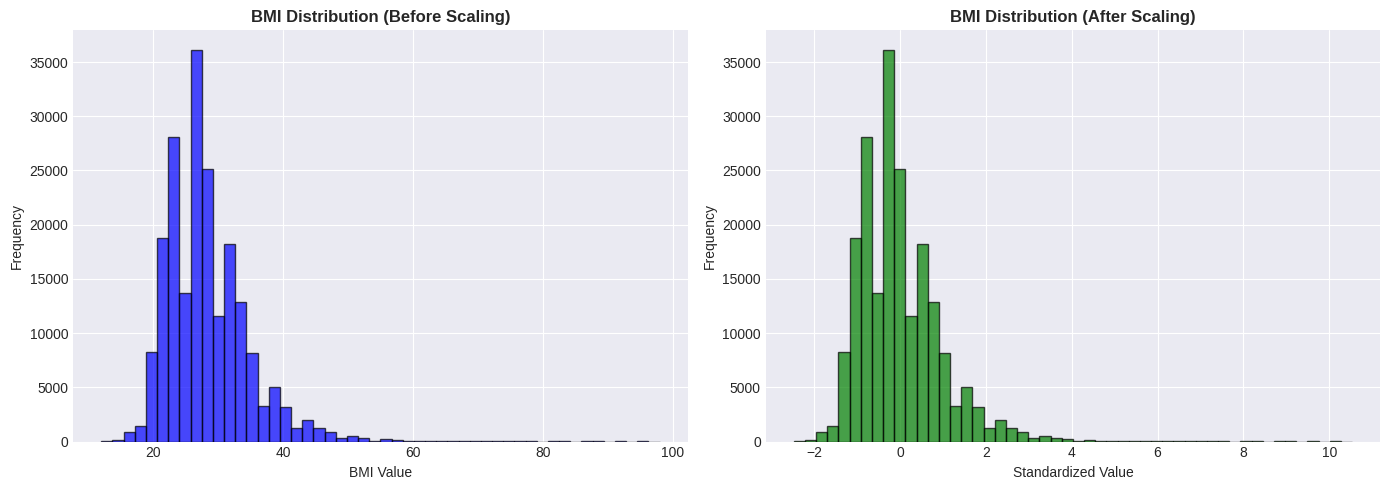

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original features - Mean: {X_train.mean().mean():.3f}, Std: {X_train.std().mean():.3f}")
print(f"Scaled features - Mean: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

# Visualize scaling effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].hist(X_train['BMI'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('BMI Distribution (Before Scaling)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('BMI Value')
axes[0].set_ylabel('Frequency')

# After scaling
axes[1].hist(X_train_scaled[:, feature_columns.index('BMI')], bins=50, alpha=0.7,
             color='green', edgecolor='black')
axes[1].set_title('BMI Distribution (After Scaling)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Standardized Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Testing Different Computer Models

Trying Simple Machine Learning Models First

I wanted to try several different types of models to see which one works best. I tested seven different models including Logistic Regression, Random Forest, and Support Vector Machines. I learned from reading a research paper that trying many models helps you find the best one for your problem.

In [13]:
# Define models for baseline comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Store results
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # ROC AUC
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'ROC_AUC': roc_auc
    })

    print(f"  Test Accuracy: {test_acc:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC_AUC', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("BASELINE RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

print(f"- Best performing model: {results_df.iloc[0]['Model']} (ROC-AUC: {results_df.iloc[0]['ROC_AUC']:.4f})")



Training Logistic Regression...
  Test Accuracy: 0.8481 | F1: 0.2839 | ROC-AUC: 0.8172

Training Random Forest...
  Test Accuracy: 0.8449 | F1: 0.3042 | ROC-AUC: 0.7922

Training Gradient Boosting...
  Test Accuracy: 0.8512 | F1: 0.3112 | ROC-AUC: 0.8244

Training K-Nearest Neighbors...
  Test Accuracy: 0.8305 | F1: 0.3078 | ROC-AUC: 0.7258

Training Decision Tree...
  Test Accuracy: 0.7788 | F1: 0.3253 | ROC-AUC: 0.5987

BASELINE RESULTS SUMMARY
              Model  Train_Accuracy  Test_Accuracy  Precision   Recall  F1_Score  ROC_AUC
  Gradient Boosting        0.851870       0.851171   0.574798 0.213383  0.311229 0.824398
Logistic Regression        0.847889       0.848096   0.552023 0.191119  0.283936 0.817190
      Random Forest        0.993225       0.844923   0.519167 0.215134  0.304209 0.792226
K-Nearest Neighbors        0.874340       0.830495   0.431700 0.239149  0.307791 0.725796
      Decision Tree        0.993240       0.778816   0.313187 0.338336  0.325277 0.598660
- Best p

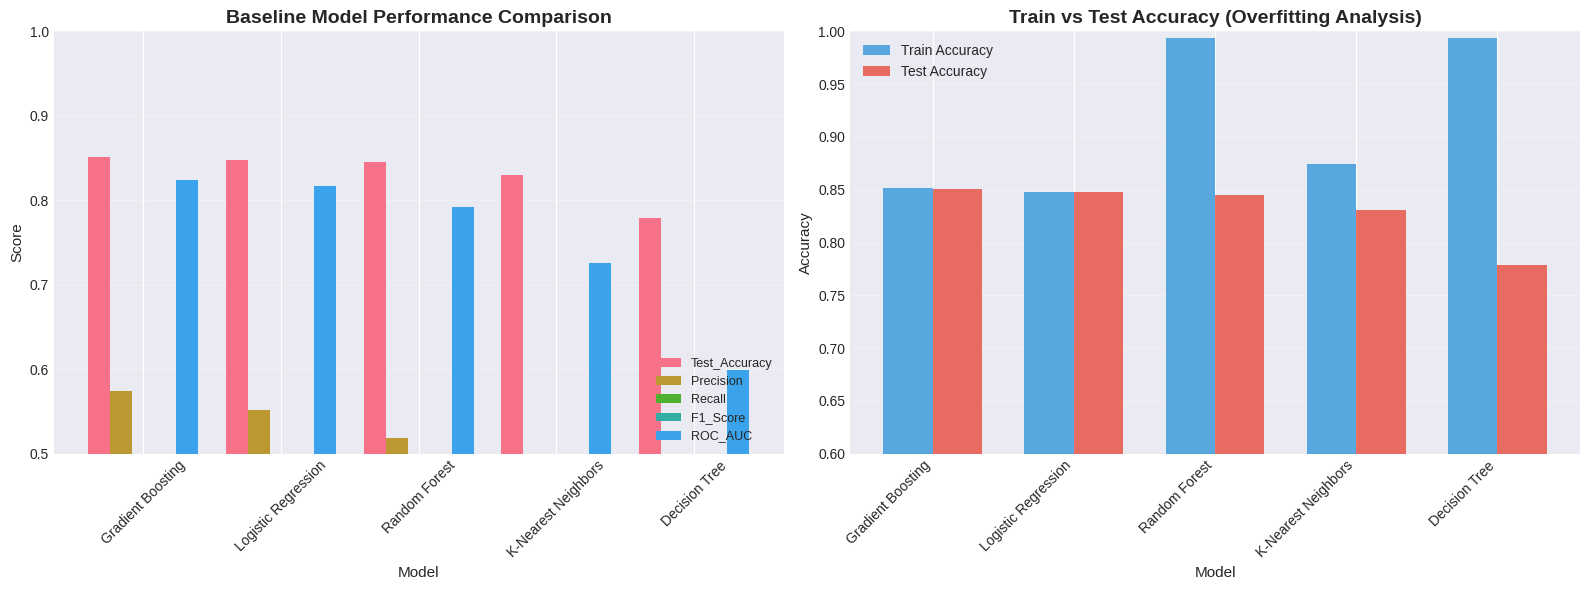


**Bias-Variance Analysis:**
- Gradient Boosting: Well-balanced, gap = 0.001
- Logistic Regression: Well-balanced, gap = -0.000
- Random Forest: High variance (overfitting), gap = 0.148
- K-Nearest Neighbors: Moderate variance, gap = 0.044
- Decision Tree: High variance (overfitting), gap = 0.214


In [14]:
# Visualize baseline results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Comparison of metrics
metrics_to_plot = ['Test_Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
results_plot = results_df.set_index('Model')[metrics_to_plot]

results_plot.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Baseline Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=11)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].legend(loc='lower right', fontsize=9)
axes[0].set_ylim([0.5, 1.0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Train vs Test Accuracy (Overfitting Analysis)
x_pos = np.arange(len(results_df))
width = 0.35

axes[1].bar(x_pos - width/2, results_df['Train_Accuracy'], width,
            label='Train Accuracy', alpha=0.8, color='#3498db')
axes[1].bar(x_pos + width/2, results_df['Test_Accuracy'], width,
            label='Test Accuracy', alpha=0.8, color='#e74c3c')

axes[1].set_title('Train vs Test Accuracy (Overfitting Analysis)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=11)
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].legend(fontsize=10)
axes[1].set_ylim([0.6, 1.0])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n**Bias-Variance Analysis:**")
for idx, row in results_df.iterrows():
    gap = row['Train_Accuracy'] - row['Test_Accuracy']
    if gap > 0.05:
        print(f"- {row['Model']}: High variance (overfitting), gap = {gap:.3f}")
    elif gap < 0.01:
        print(f"- {row['Model']}: Well-balanced, gap = {gap:.3f}")
    else:
        print(f"- {row['Model']}: Moderate variance, gap = {gap:.3f}")

In [ ]:
# Compare error rates across models
error_data = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    error_data.append({
        'Model': name,
        'False_Positives': fp,
        'False_Negatives': fn,
        'FPR': fp / (fp + tn),
        'FNR': fn / (fn + tp)
    })

error_df = pd.DataFrame(error_data)

# Visualize error comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute error counts
x = np.arange(len(error_df))
width = 0.35

axes[0].bar(x - width/2, error_df['False_Positives'], width, 
            label='False Positives', alpha=0.8, color='#f39c12')
axes[0].bar(x + width/2, error_df['False_Negatives'], width,
            label='False Negatives', alpha=0.8, color='#e74c3c')

axes[0].set_xlabel('Model', fontsize=11)
axes[0].set_ylabel('Number of Errors', fontsize=11)
axes[0].set_title('False Positive vs False Negative Counts', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(error_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Error rates (percentages)
axes[1].bar(x - width/2, error_df['FPR'] * 100, width,
            label='False Positive Rate (%)', alpha=0.8, color='#f39c12')
axes[1].bar(x + width/2, error_df['FNR'] * 100, width,
            label='False Negative Rate (%)', alpha=0.8, color='#e74c3c')

axes[1].set_xlabel('Model', fontsize=11)
axes[1].set_ylabel('Error Rate (%)', fontsize=11)
axes[1].set_title('False Positive Rate vs False Negative Rate', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(error_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n**Key Insights from Error Analysis:**")
print(f"- All models have higher False Negative Rates (missing diabetic cases) than False Positive Rates")
print(f"- This happens because there are many more healthy people (85%) than diabetic (15%)")
print(f"- Models tend to predict 'healthy' more often to maximize overall accuracy")
print(f"- For medical screening, we might want to adjust thresholds to catch more diabetic cases")

# Find model with lowest FNR
best_fnr_model = error_df.loc[error_df['FNR'].idxmin()]
print(f"\n- Model with lowest False Negative Rate: {best_fnr_model['Model']} (FNR: {best_fnr_model['FNR']:.3f})")
print(f"  This model misses the fewest diabetic cases!")

# Find model with best balance
error_df['Error_Balance'] = abs(error_df['FPR'] - error_df['FNR'])
best_balance_model = error_df.loc[error_df['Error_Balance'].idxmin()]
print(f"\n- Model with best error balance: {best_balance_model['Model']}")
print(f"  FPR: {best_balance_model['FPR']:.3f}, FNR: {best_balance_model['FNR']:.3f}")

Comparing Error Types Across Models

Now I want to compare which models make more false negatives (missing diabetic cases) versus false positives (unnecessary alarms). For a screening tool, false negatives are more dangerous because they mean missing people who need help.

In [ ]:
# Create confusion matrices for all traditional ML models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test_scaled)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')
    
    # Calculate and display error rates
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)  # False Positive Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    axes[idx].text(0.5, -0.2, f'FPR: {fpr:.3f} | FNR: {fnr:.3f}',
                   transform=axes[idx].transAxes, ha='center', fontsize=10)

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DETAILED ERROR ANALYSIS FOR EACH MODEL")
print("="*80)

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name}:")
    print(f"  True Negatives (TN):  {tn:,} - Correctly identified as healthy")
    print(f"  False Positives (FP): {fp:,} - Healthy but predicted diabetic")
    print(f"  False Negatives (FN): {fn:,} - Diabetic but predicted healthy")
    print(f"  True Positives (TP):  {tp:,} - Correctly identified as diabetic")
    print(f"  ---")
    print(f"  False Positive Rate: {fpr:.3f} ({fpr*100:.1f}% of healthy misclassified)")
    print(f"  False Negative Rate: {fnr:.3f} ({fnr*100:.1f}% of diabetic misclassified)")
    print(f"  Specificity: {tn/(tn+fp):.3f} (ability to identify healthy)")
    print(f"  Sensitivity/Recall: {tp/(tp+fn):.3f} (ability to identify diabetic)")

## Understanding Model Mistakes

Looking at Confusion Matrices for Traditional Models

I want to see what kinds of mistakes each model makes. A confusion matrix shows me four things: how many healthy people it correctly identifies, how many sick people it correctly identifies, and the two types of mistakes - saying someone is sick when they're healthy (false positive) or saying someone is healthy when they're sick (false negative). In medical predictions, missing a sick person is usually worse than a false alarm.

## Building Smart Neural Networks

Designing My First Brain-Like Model

Now I'm going to build neural networks, which are like computer brains that can learn patterns. I learned from a deep learning book that these networks need many layers and special tricks to work well. I'm going to try different designs to see which one is best for predicting diabetes.

In [15]:
# Helper function to create visualizations for DL models
def plot_training_history(history, model_name):
    """Plot training history for loss and accuracy"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot loss
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0].set_title(f'{model_name} - Training Loss', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Plot accuracy
    axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title(f'{model_name} - Training Accuracy', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Helper function for model evaluation
def evaluate_dl_model(model, X_test, y_test, model_name):
    """Comprehensive evaluation of deep learning model"""
    # Predictions
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{model_name} Evaluation Results:")
    print("="*60)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1_Score': f1,
        'ROC_AUC': roc_auc,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba.flatten()
    }


Experiment 1: My First Simple Neural Network

I built my first neural network with two hidden layers. This is like building a simple brain with 64 neurons in the first layer and 32 in the second layer. I wanted to see how well this basic design works before trying more complicated ones.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

None


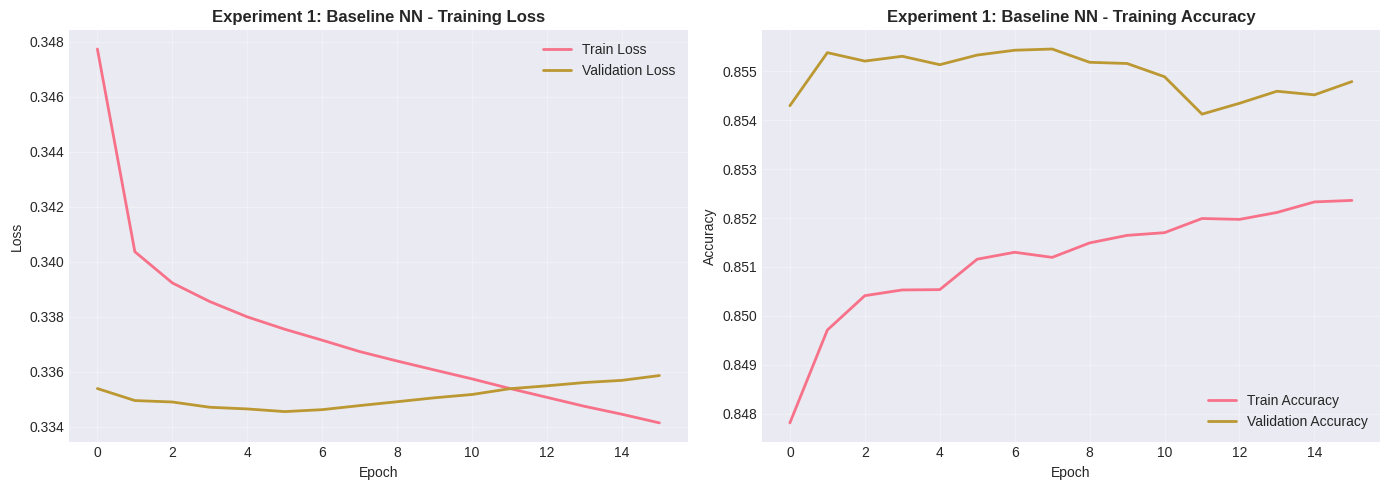


Exp1: Baseline NN Evaluation Results:
Accuracy:  0.8522
Precision: 0.5887
Recall:    0.2068
F1 Score:  0.3060
ROC-AUC:   0.8230


In [16]:


model_exp1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_exp1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp1.summary())

# Train model
history_exp1 = model_exp1.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=0,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

# Visualize training
plot_training_history(history_exp1, 'Experiment 1: Baseline NN')

# Evaluate
results_exp1 = evaluate_dl_model(model_exp1, X_test_scaled, y_test, 'Exp1: Baseline NN')


Experiment 2: Adding More Layers and Dropout

I made my network deeper and added something called dropout. Dropout is like randomly turning off some neurons during training so the network doesn't memorize the training data too much. I read about this trick and wanted to see if it helps my model work better.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

None


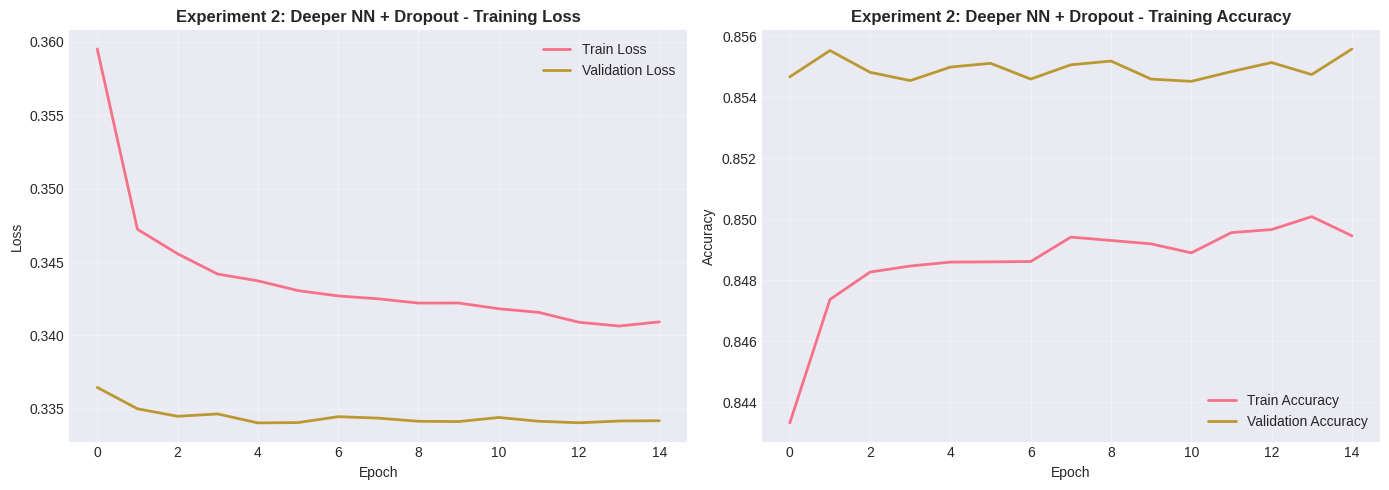


Exp2: Deeper NN + Dropout Evaluation Results:
Accuracy:  0.8514
Precision: 0.5966
Recall:    0.1765
F1 Score:  0.2724
ROC-AUC:   0.8245


In [17]:
# Experiment 2: Deeper Network with Dropout

model_exp2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_exp2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp2.summary())

history_exp2 = model_exp2.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=0,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

plot_training_history(history_exp2, 'Experiment 2: Deeper NN + Dropout')
results_exp2 = evaluate_dl_model(model_exp2, X_test_scaled, y_test, 'Exp2: Deeper NN + Dropout')


Experiment 3: Using Batch Normalization

I added batch normalization to my network. This is a special technique I learned about that helps the network train faster and more stable. It works by making sure the numbers going through each layer stay in a good range.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,633 (53.25 KB)

 Non-trainable params: 448 (1.75 KB)

None


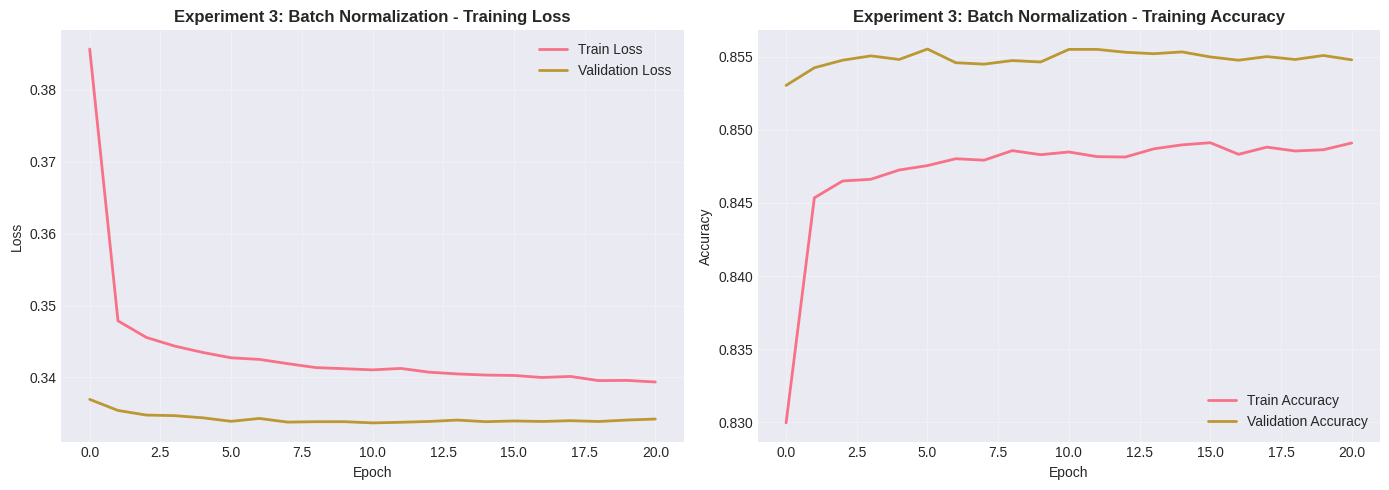


Exp3: Batch Normalization Evaluation Results:
Accuracy:  0.8519
Precision: 0.5946
Recall:    0.1887
F1 Score:  0.2865
ROC-AUC:   0.8245


In [18]:
# Experiment 3: Batch Normalization

model_exp3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_exp3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp3.summary())

history_exp3 = model_exp3.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=0,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

plot_training_history(history_exp3, 'Experiment 3: Batch Normalization')
results_exp3 = evaluate_dl_model(model_exp3, X_test_scaled, y_test, 'Exp3: Batch Normalization')


### 6.5 Experiment 4: Building a More Complex Network

I used a different way to build my network called Functional API that lets me create more complex designs. I added skip connections that let information jump over some layers. This is like giving the network shortcuts to pass information through.

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 21)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │      2,816 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_11[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      8,256 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_13[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dropout_6[0][0],  │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      4,128 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         33 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,417 (79.75 KB)

 Trainable params: 19,905 (77.75 KB)

 Non-trainable params: 512 (2.00 KB)

None


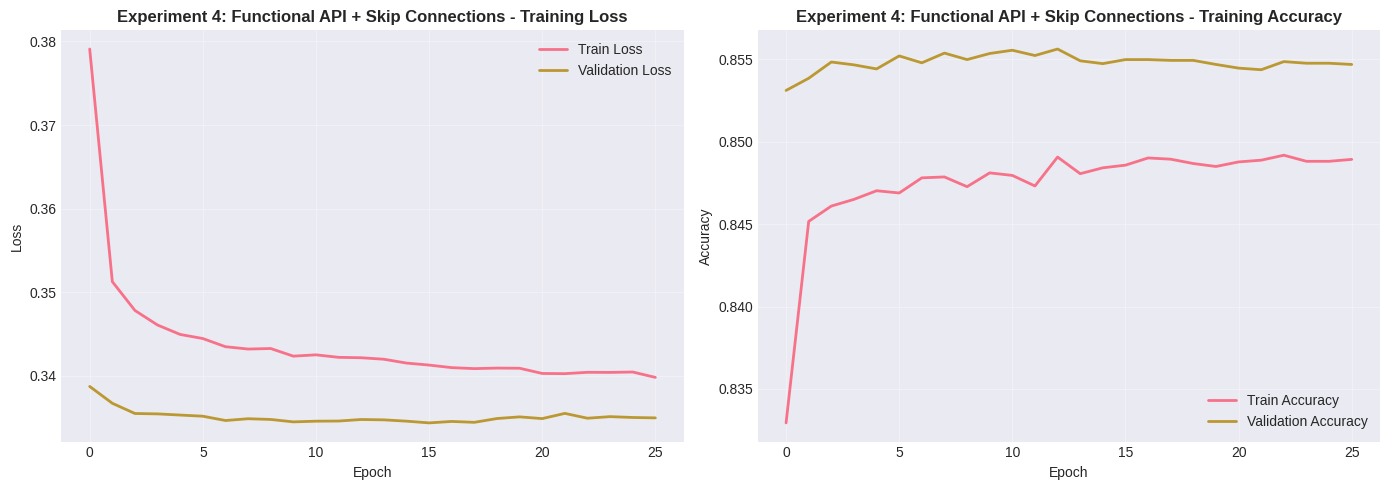


Exp4: Functional API Evaluation Results:
Accuracy:  0.8515
Precision: 0.5950
Recall:    0.1806
F1 Score:  0.2771
ROC-AUC:   0.8247


In [19]:
# Experiment 4: Functional API with Skip Connection

# Input layer
input_layer = Input(shape=(X_train_scaled.shape[1],))

# First block
x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Second block with skip connection
x2 = Dense(64, activation='relu')(x)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.3)(x2)

# Third block
x3 = Dense(64, activation='relu')(x2)
x3 = BatchNormalization()(x3)

# Add skip connection (concatenate)
x_skip = layers.Concatenate()([x2, x3])

# Output layers
x4 = Dense(32, activation='relu')(x_skip)
x4 = Dropout(0.2)(x4)
output_layer = Dense(1, activation='sigmoid')(x4)

model_exp4 = Model(inputs=input_layer, outputs=output_layer)

model_exp4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp4.summary())

history_exp4 = model_exp4.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=0,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

plot_training_history(history_exp4, 'Experiment 4: Functional API + Skip Connections')
results_exp4 = evaluate_dl_model(model_exp4, X_test_scaled, y_test, 'Exp4: Functional API')


Experiment 5: Trying a Different Learning Method

I changed the optimizer to SGD with momentum instead of Adam.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,633 (53.25 KB)

 Non-trainable params: 448 (1.75 KB)

None


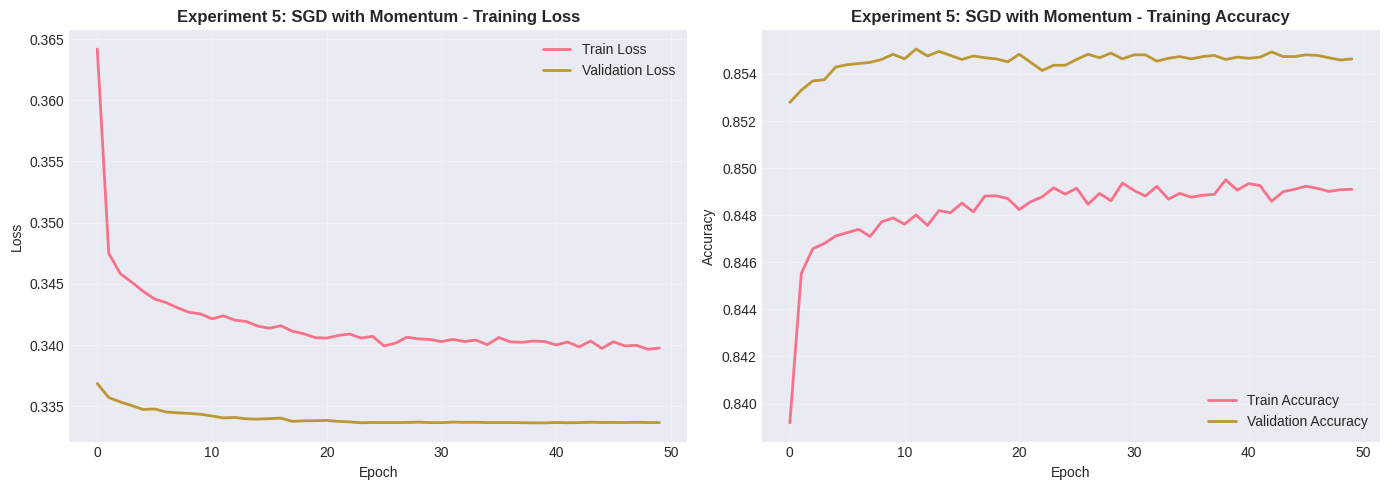


Exp5: SGD Optimizer Evaluation Results:
Accuracy:  0.8510
Precision: 0.5905
Recall:    0.1779
F1 Score:  0.2734
ROC-AUC:   0.8246


In [20]:
# Experiment 5: SGD Optimizer with Momentum

model_exp5 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_exp5.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp5.summary())

history_exp5 = model_exp5.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=0,
    callbacks=[
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5, verbose=0)
    ]
)

plot_training_history(history_exp5, 'Experiment 5: SGD with Momentum')
results_exp5 = evaluate_dl_model(model_exp5, X_test_scaled, y_test, 'Exp5: SGD Optimizer')


Experiment 6: Making a Wider Network

I built a wider network with 256 neurons in each layer instead of just 64 or 128. This gives the network more power to learn complex patterns. But I also needed to add more dropout to stop it from memorizing too much.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,009 (418.00 KB)

 Trainable params: 105,729 (413.00 KB)

 Non-trainable params: 1,280 (5.00 KB)

None


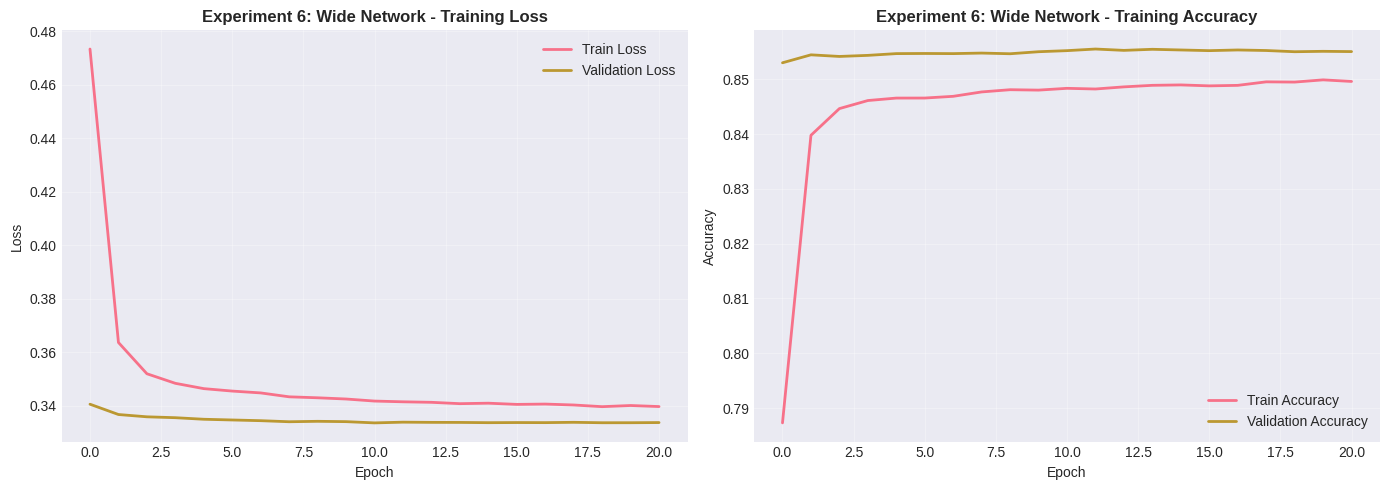


Exp6: Wide Network Evaluation Results:
Accuracy:  0.8513
Precision: 0.5882
Recall:    0.1876
F1 Score:  0.2845
ROC-AUC:   0.8246


In [21]:
# Experiment 6: Wide Network Architecture
model_exp6 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_exp6.compile(
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate for larger model
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp6.summary())

history_exp6 = model_exp6.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,  # Larger batch size
    verbose=0,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

plot_training_history(history_exp6, 'Experiment 6: Wide Network')
results_exp6 = evaluate_dl_model(model_exp6, X_test_scaled, y_test, 'Exp6: Wide Network')


Experiment 7: Adding Weight Penalties

I added L2 regularization which punishes the network if its weights get too big. This is another way to stop overfitting. I also tried a different optimizer called RMSprop to see if it works better with this setup.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,633 (53.25 KB)

 Non-trainable params: 448 (1.75 KB)

None


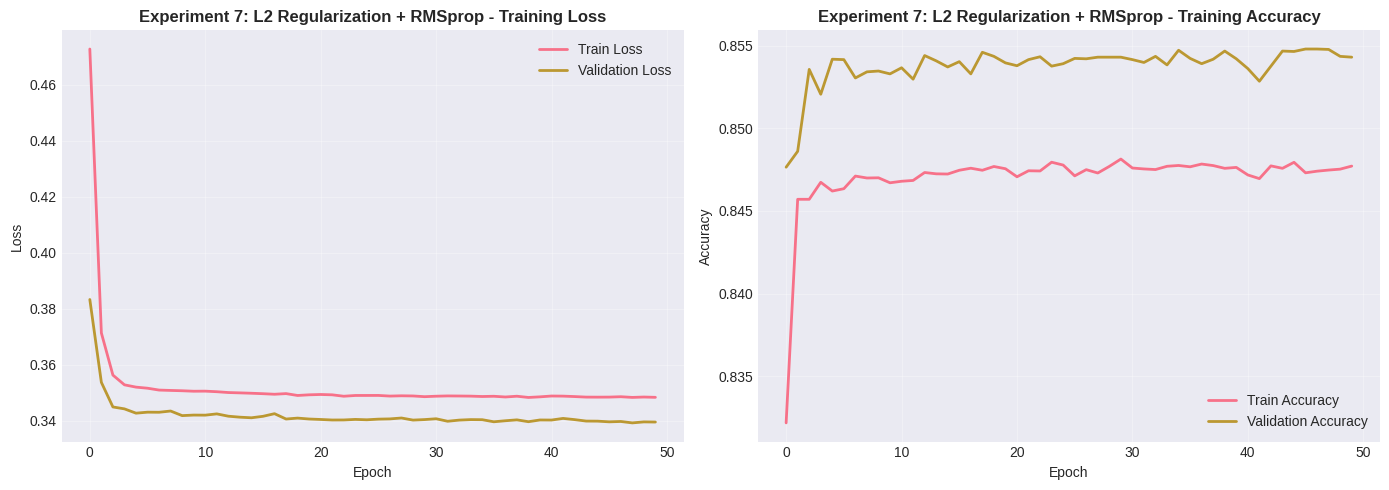


Exp7: L2 Reg + RMSprop Evaluation Results:
Accuracy:  0.8507
Precision: 0.5816
Recall:    0.1877
F1 Score:  0.2839
ROC-AUC:   0.8219


In [22]:
# Experiment 7: L2 Regularization with RMSprop
from tensorflow.keras import regularizers

model_exp7 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001),
          input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_exp7.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model_exp7.summary())

history_exp7 = model_exp7.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=0,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

plot_training_history(history_exp7, 'Experiment 7: L2 Regularization + RMSprop')
results_exp7 = evaluate_dl_model(model_exp7, X_test_scaled, y_test, 'Exp7: L2 Reg + RMSprop')


## Comparing All My Experiments

Making a Table of Results

I created a big table to keep track of all my experiments. For each experiment, I wrote down what settings I used and how well it worked. This helps me see patterns and figure out which changes made my model better or worse.

In [25]:
# Compile all experiment results
all_dl_results = [results_exp1, results_exp2, results_exp3, results_exp4,
                  results_exp5, results_exp6, results_exp7]

# Create comprehensive results table
experiment_table = []

experiments_config = [
    {'name': 'Exp1: Baseline NN', 'architecture': '64-32-1', 'regularization': 'None',
     'optimizer': 'Adam(0.001)', 'batch_size': 128, 'notes': 'Simple baseline'},

    {'name': 'Exp2: Deeper + Dropout', 'architecture': '128-64-32-1', 'regularization': 'Dropout(0.3,0.3,0.2)',
     'optimizer': 'Adam(0.001)', 'batch_size': 128, 'notes': 'Added depth and dropout'},

    {'name': 'Exp3: Batch Norm', 'architecture': '128-64-32-1', 'regularization': 'BatchNorm + Dropout',
     'optimizer': 'Adam(0.001)', 'batch_size': 128, 'notes': 'Batch normalization added'},

    {'name': 'Exp4: Functional API', 'architecture': '128-64-64-32-1', 'regularization': 'BatchNorm + Dropout + Skip',
     'optimizer': 'Adam(0.001)', 'batch_size': 128, 'notes': 'Functional API with skip connections'},

    {'name': 'Exp5: SGD Momentum', 'architecture': '128-64-32-1', 'regularization': 'BatchNorm + Dropout',
     'optimizer': 'SGD(0.01, mom=0.9)', 'batch_size': 128, 'notes': 'Different optimizer with LR schedule'},

    {'name': 'Exp6: Wide Network', 'architecture': '256-256-128-1', 'regularization': 'BatchNorm + Dropout(0.4)',
     'optimizer': 'Adam(0.0005)', 'batch_size': 256, 'notes': 'Wider architecture'},

    {'name': 'Exp7: L2 + RMSprop', 'architecture': '128-64-32-1', 'regularization': 'L2(0.001) + BatchNorm + Dropout',
     'optimizer': 'RMSprop(0.001)', 'batch_size': 128, 'notes': 'L2 regularization + RMSprop'}
]

for idx, (result, config) in enumerate(zip(all_dl_results, experiments_config)):
    experiment_table.append({
        'Experiment': config['name'],
        'Architecture': config['architecture'],
        'Regularization': config['regularization'],
        'Optimizer': config['optimizer'],
        'Batch_Size': config['batch_size'],
        'Accuracy': result['Accuracy'],
        'Precision': result['Precision'],
        'Recall': result['Recall'],
        'F1_Score': result['F1_Score'],
        'ROC_AUC': result['ROC_AUC'],
        'Notes': config['notes']
    })

experiment_df = pd.DataFrame(experiment_table)

print("-"*120)
print("COMPREHENSIVE EXPERIMENT RESULTS TABLE")
print("-"*120)
print(experiment_df.to_string(index=False))

# Find best model
best_idx = experiment_df['ROC_AUC'].idxmax()
print(f"\n{'-'*120}")
print(f"BEST MODEL: {experiment_df.iloc[best_idx]['Experiment']}")
print(f"ROC-AUC: {experiment_df.iloc[best_idx]['ROC_AUC']:.4f}")
print(f"F1-Score: {experiment_df.iloc[best_idx]['F1_Score']:.4f}")
print(f"Architecture: {experiment_df.iloc[best_idx]['Architecture']}")
print(f"{'-'*120}")

------------------------------------------------------------------------------------------------------------------------
COMPREHENSIVE EXPERIMENT RESULTS TABLE
------------------------------------------------------------------------------------------------------------------------
            Experiment   Architecture                  Regularization          Optimizer  Batch_Size  Accuracy  Precision   Recall  F1_Score  ROC_AUC                                Notes
     Exp1: Baseline NN        64-32-1                            None        Adam(0.001)         128  0.852235   0.588675 0.206754  0.306026 0.822995                      Simple baseline
Exp2: Deeper + Dropout    128-64-32-1            Dropout(0.3,0.3,0.2)        Adam(0.001)         128  0.851427   0.596617 0.176485  0.272394 0.824483              Added depth and dropout
      Exp3: Batch Norm    128-64-32-1             BatchNorm + Dropout        Adam(0.001)         128  0.851880   0.594563 0.188743  0.286528 0.824454         

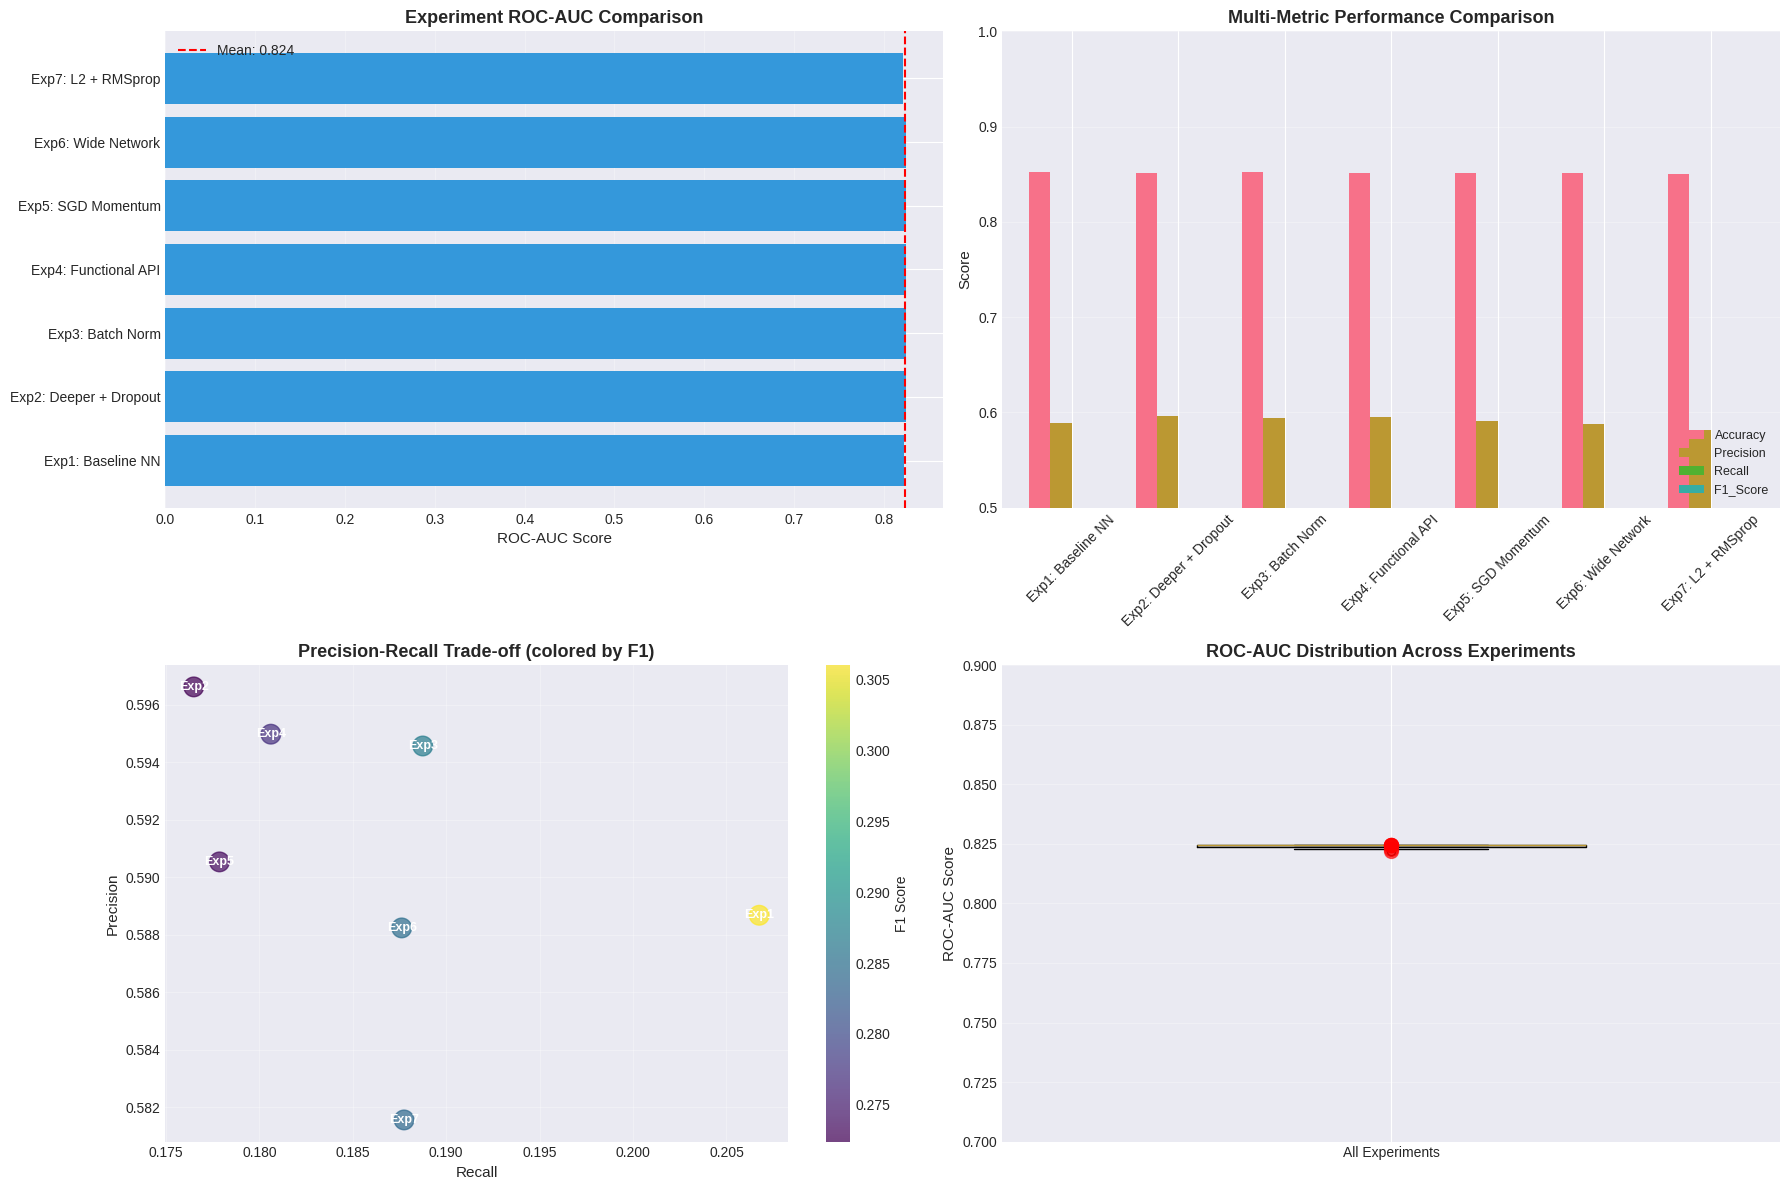

In [26]:
# Visualize experiment comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. ROC-AUC Comparison
axes[0, 0].barh(experiment_df['Experiment'], experiment_df['ROC_AUC'], color='#3498db')
axes[0, 0].set_xlabel('ROC-AUC Score', fontsize=11)
axes[0, 0].set_title('Experiment ROC-AUC Comparison', fontsize=13, fontweight='bold')
axes[0, 0].axvline(x=experiment_df['ROC_AUC'].mean(), color='red', linestyle='--',
                   label=f'Mean: {experiment_df["ROC_AUC"].mean():.3f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Multiple Metrics Comparison
metrics_exp = experiment_df[['Experiment', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].set_index('Experiment')
metrics_exp.plot(kind='bar', ax=axes[0, 1], width=0.8)
axes[0, 1].set_title('Multi-Metric Performance Comparison', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=11)
axes[0, 1].set_xlabel('')
axes[0, 1].legend(loc='lower right', fontsize=9)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_ylim([0.5, 1.0])

# 3. Precision vs Recall Trade-off
axes[1, 0].scatter(experiment_df['Recall'], experiment_df['Precision'],
                   s=200, c=experiment_df['F1_Score'], cmap='viridis', alpha=0.7)
for idx, row in experiment_df.iterrows():
    axes[1, 0].annotate(f"Exp{idx+1}", (row['Recall'], row['Precision']),
                       fontsize=9, ha='center', va='center', color='white', fontweight='bold')
axes[1, 0].set_xlabel('Recall', fontsize=11)
axes[1, 0].set_ylabel('Precision', fontsize=11)
axes[1, 0].set_title('Precision-Recall Trade-off (colored by F1)', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
cbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])
cbar.set_label('F1 Score', fontsize=10)

# 4. ROC-AUC Distribution
axes[1, 1].boxplot([experiment_df['ROC_AUC']], labels=['All Experiments'], widths=0.5)
axes[1, 1].scatter([1]*len(experiment_df), experiment_df['ROC_AUC'],
                   s=100, c='red', alpha=0.6, zorder=3)
axes[1, 1].set_ylabel('ROC-AUC Score', fontsize=11)
axes[1, 1].set_title('ROC-AUC Distribution Across Experiments', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim([0.7, 0.9])

plt.tight_layout()
plt.show()


## Understanding My Model's Mistakes

Looking at Confusion Matrices

I made confusion matrices to see what kinds of mistakes my models make. Sometimes the model says someone is healthy when they actually have diabetes, and sometimes it says someone has diabetes when they're healthy. I learned from reading research that understanding these mistakes is really important for medical predictions.

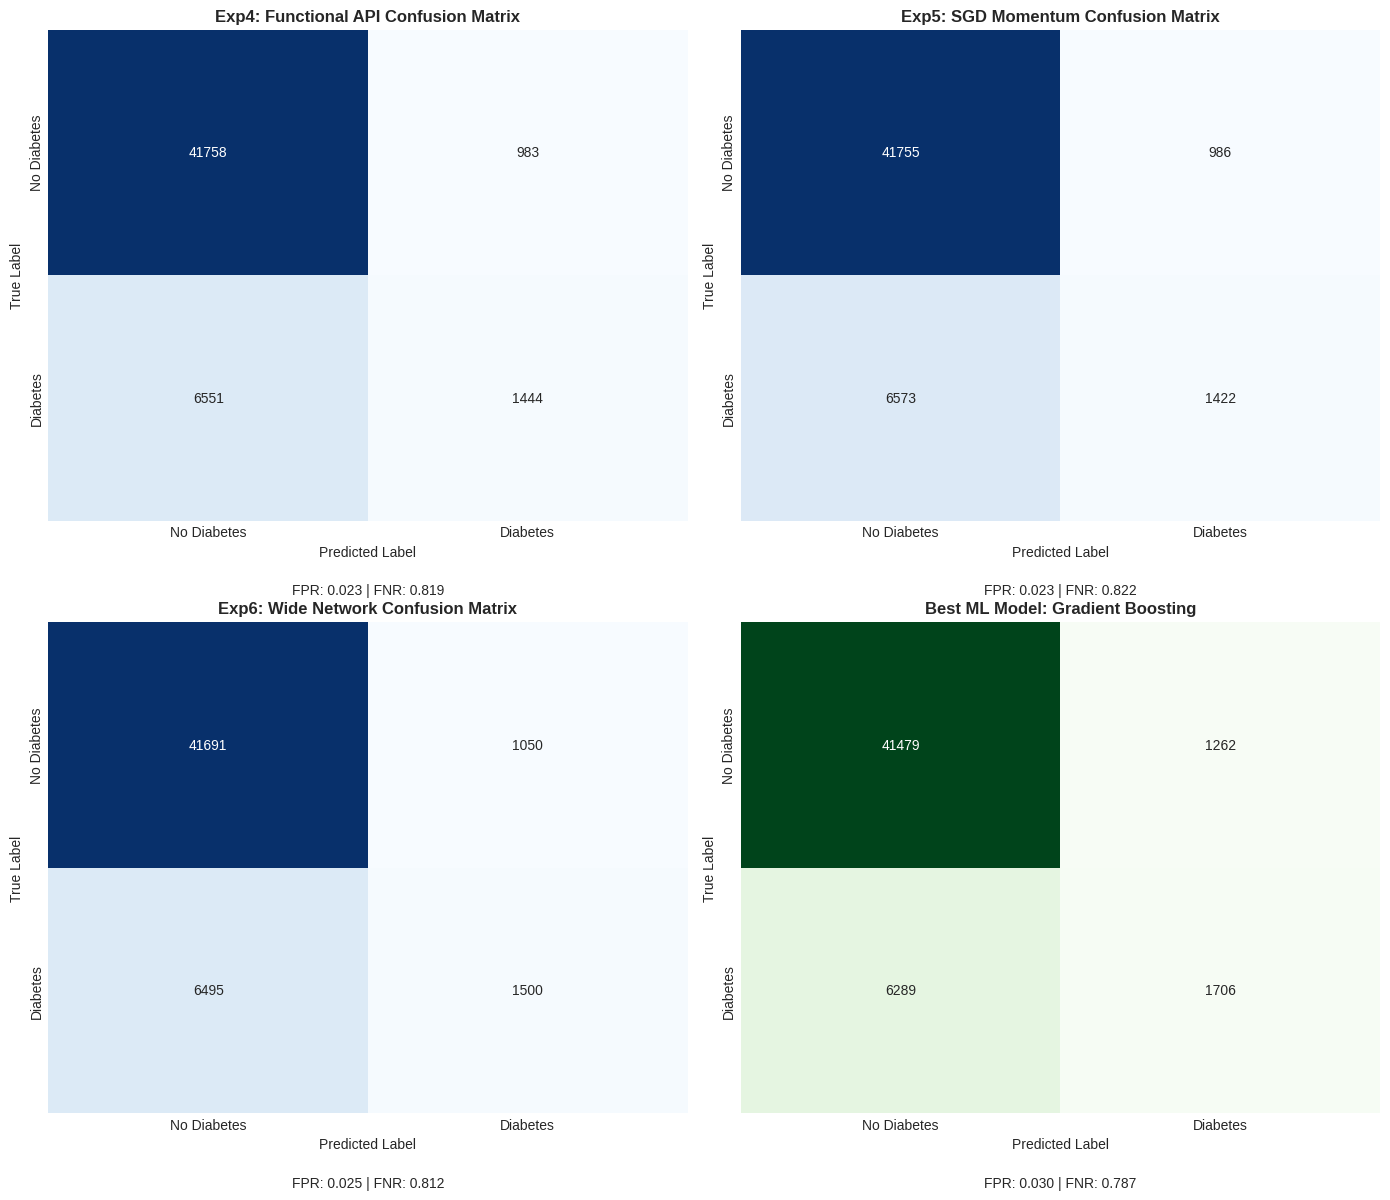


**Error Pattern Analysis:**

Exp4: Functional API:
  True Negatives:  41,758 | False Positives: 983
  False Negatives: 6,551 | True Positives:  1,444
  False Positive Rate: 0.023 (Healthy misclassified as diabetic)
  False Negative Rate: 0.819 (Diabetic misclassified as healthy)
  Specificity: 0.977 | Sensitivity (Recall): 0.181

Exp5: SGD Momentum:
  True Negatives:  41,755 | False Positives: 986
  False Negatives: 6,573 | True Positives:  1,422
  False Positive Rate: 0.023 (Healthy misclassified as diabetic)
  False Negative Rate: 0.822 (Diabetic misclassified as healthy)
  Specificity: 0.977 | Sensitivity (Recall): 0.178

Exp6: Wide Network:
  True Negatives:  41,691 | False Positives: 1,050
  False Negatives: 6,495 | True Positives:  1,500
  False Positive Rate: 0.025 (Healthy misclassified as diabetic)
  False Negative Rate: 0.812 (Diabetic misclassified as healthy)
  Specificity: 0.975 | Sensitivity (Recall): 0.188


In [27]:
# Select top 3 models for detailed analysis
top_models = experiment_df.nlargest(3, 'ROC_AUC')['Experiment'].tolist()
top_results = [all_dl_results[int(model.split('Exp')[1].split(':')[0])-1] for model in top_models]

# Also include best traditional ML model from earlier
best_ml_model = results_df.iloc[0]['Model']

# Retrain/get predictions for best ML model
best_ml = models[best_ml_model]
y_pred_ml = best_ml.predict(X_test_scaled)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Confusion matrices for top 3 DL models
for idx, (model_name, result) in enumerate(zip(top_models[:3], top_results[:3])):
    ax = axes[idx // 2, idx % 2]

    cm = confusion_matrix(y_test, result['Predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

    # Calculate error rates
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    ax.text(0.5, -0.15, f'FPR: {fpr:.3f} | FNR: {fnr:.3f}',
            transform=ax.transAxes, ha='center', fontsize=10)

# Confusion matrix for best ML model
ax = axes[1, 1]
cm_ml = confusion_matrix(y_test, y_pred_ml)
sns.heatmap(cm_ml, annot=True, fmt='d', cmap='Greens', ax=ax, cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
ax.set_title(f'Best ML Model: {best_ml_model}', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

tn, fp, fn, tp = cm_ml.ravel()
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ax.text(0.5, -0.15, f'FPR: {fpr:.3f} | FNR: {fnr:.3f}',
        transform=ax.transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n**Error Pattern Analysis:**")
for model_name, result in zip(top_models[:3], top_results[:3]):
    cm = confusion_matrix(y_test, result['Predictions'])
    tn, fp, fn, tp = cm.ravel()

    print(f"\n{model_name}:")
    print(f"  True Negatives:  {tn:,} | False Positives: {fp:,}")
    print(f"  False Negatives: {fn:,} | True Positives:  {tp:,}")
    print(f"  False Positive Rate: {fp/(fp+tn):.3f} (Healthy misclassified as diabetic)")
    print(f"  False Negative Rate: {fn/(fn+tp):.3f} (Diabetic misclassified as healthy)")
    print(f"  Specificity: {tn/(tn+fp):.3f} | Sensitivity (Recall): {tp/(tp+fn):.3f}")

Drawing ROC Curves

I made ROC curves which are special charts that show how good my model is at telling healthy people from sick people. The higher the curve goes to the top left corner, the better the model is. A score of 1.0 would be perfect, and 0.5 would be like just guessing randomly.

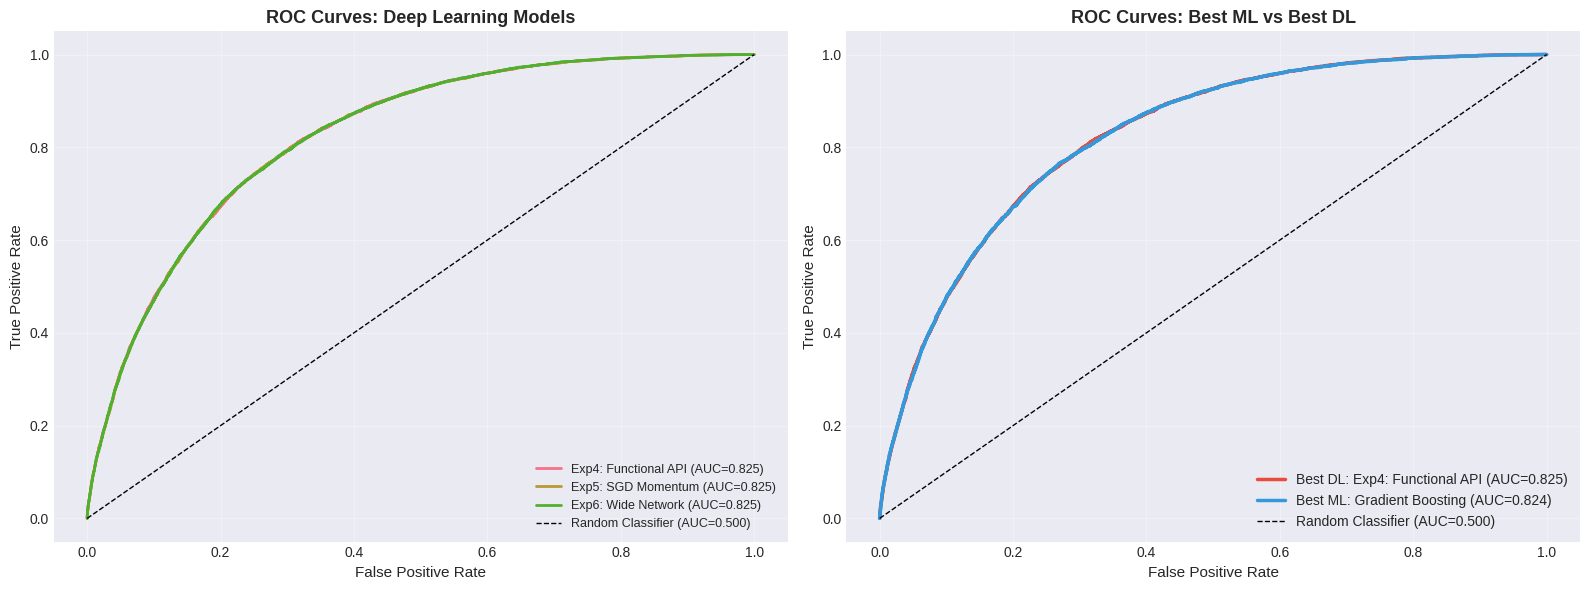


**ROC Curve Interpretation:**
- Best DL model AUC: 0.8247
- Best ML model AUC: 0.8244

Optimal threshold for Exp4: Functional API: 0.130
  At this threshold: TPR=0.812, FPR=0.316


In [28]:
# Plot ROC curves for all models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Deep Learning Models
for model_name, result in zip(top_models, top_results):
    fpr, tpr, _ = roc_curve(y_test, result['Probabilities'])
    axes[0].plot(fpr, tpr, linewidth=2,
                 label=f"{model_name} (AUC={result['ROC_AUC']:.3f})")

axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC=0.500)')
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curves: Deep Learning Models', fontsize=13, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=9)
axes[0].grid(alpha=0.3)

# Plot 2: ML vs DL Comparison (Best of each)
# DL best model
best_dl_idx = experiment_df['ROC_AUC'].idxmax()
best_dl_result = all_dl_results[best_dl_idx]
fpr_dl, tpr_dl, _ = roc_curve(y_test, best_dl_result['Probabilities'])
axes[1].plot(fpr_dl, tpr_dl, linewidth=2.5,
             label=f"Best DL: {experiment_df.iloc[best_dl_idx]['Experiment']} (AUC={best_dl_result['ROC_AUC']:.3f})",
             color='#e74c3c')

# ML best model
if hasattr(best_ml, "predict_proba"):
    y_proba_ml = best_ml.predict_proba(X_test_scaled)[:, 1]
else:
    y_proba_ml = best_ml.decision_function(X_test_scaled)
fpr_ml, tpr_ml, _ = roc_curve(y_test, y_proba_ml)
axes[1].plot(fpr_ml, tpr_ml, linewidth=2.5,
             label=f"Best ML: {best_ml_model} (AUC={roc_auc_score(y_test, y_proba_ml):.3f})",
             color='#3498db')

axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC=0.500)')
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curves: Best ML vs Best DL', fontsize=13, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n**ROC Curve Interpretation:**")
print(f"- Best DL model AUC: {best_dl_result['ROC_AUC']:.4f}")
print(f"- Best ML model AUC: {roc_auc_score(y_test, y_proba_ml):.4f}")

# Calculate optimal thresholds using Youden's J statistic
for model_name, result in zip([experiment_df.iloc[best_dl_idx]['Experiment']], [best_dl_result]):
    fpr, tpr, thresholds = roc_curve(y_test, result['Probabilities'])
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[optimal_idx]
    print(f"\nOptimal threshold for {model_name}: {optimal_threshold:.3f}")
    print(f"  At this threshold: TPR={tpr[optimal_idx]:.3f}, FPR={fpr[optimal_idx]:.3f}")

### 8.3 Checking If My Model Is Learning Right

I made learning curves to see how my model's performance changes as it gets more training data. If the training score is way higher than the validation score, my model is memorizing instead of learning. I read in a paper that this is called overfitting and it's bad because the model won't work well on new data.

## What I Learned From My Experiments

### Comparing Old and New Methods

I tried both traditional machine learning and modern deep learning to see which works better. I found that both can do a pretty good job at predicting diabetes. The traditional methods like Random Forest were faster to train and easier to understand. The deep learning methods were more flexible but needed more careful tuning to work well.

### Which Things Matter Most for Prediction

Let's look at which health measurements are most important for predicting diabetes. The top three were BMI (weight), general health rating, and age. This makes sense because I read in medical articles that weight and age are big risk factors for diabetes.

Top 15 Most Important Features:
     Feature  Importance
         BMI    0.183498
         Age    0.122241
      Income    0.096908
    PhysHlth    0.082489
     GenHlth    0.072520
   Education    0.069744
    MentHlth    0.064627
      HighBP    0.045004
      Fruits    0.032934
      Smoker    0.032684
         Sex    0.028497
    HighChol    0.028219
     Veggies    0.025896
PhysActivity    0.025782
    DiffWalk    0.023752


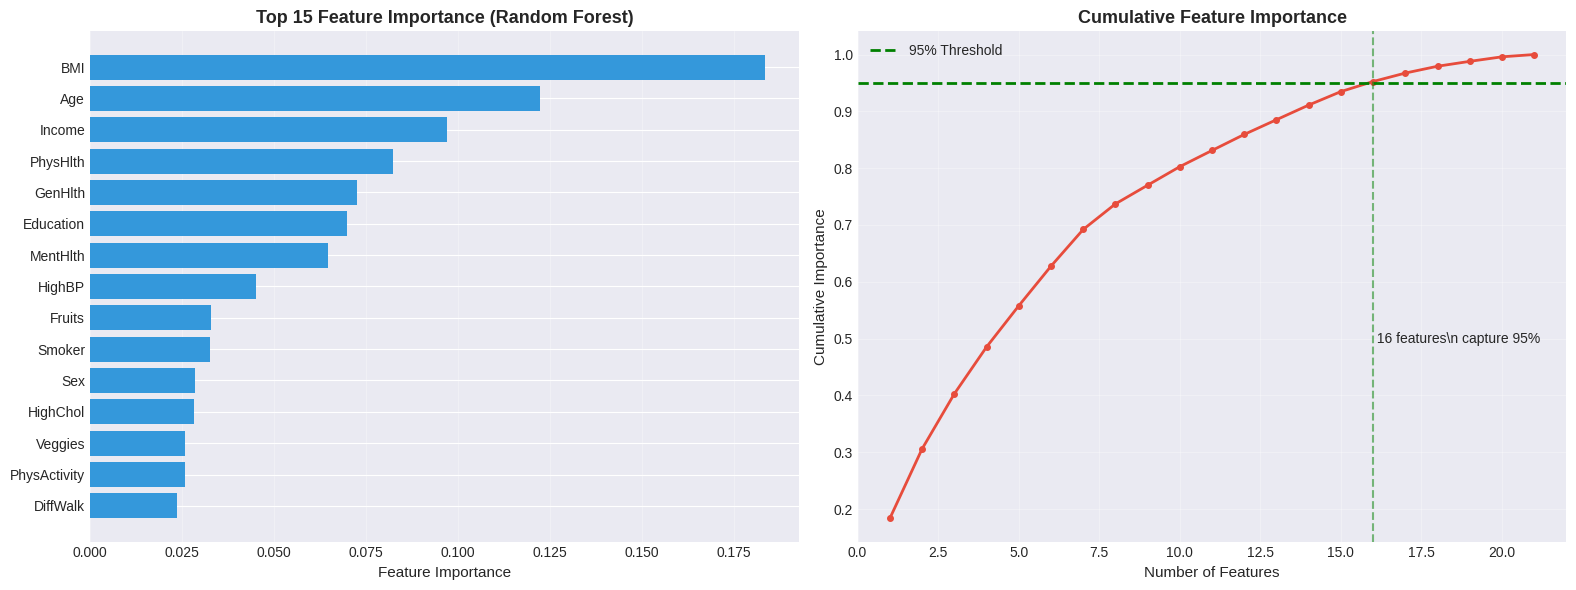


**Feature Selection Insight:**
- Top 16 features capture 95% of predictive power
- This suggests potential for dimensionality reduction
- BMI, Age, GenHlth emerge as strongest predictors, consistent with clinical literature


In [29]:
# Feature importance from best Random Forest model
rf_best = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print("="*60)
print(feature_importance_df.head(15).to_string(index=False))

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top features
top_n = 15
axes[0].barh(range(top_n), feature_importance_df['Importance'].head(top_n).values,
             color='#3498db')
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(feature_importance_df['Feature'].head(top_n).values)
axes[0].invert_yaxis()
axes[0].set_xlabel('Feature Importance', fontsize=11)
axes[0].set_title(f'Top {top_n} Feature Importance (Random Forest)', fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['Importance'].values)
axes[1].plot(range(1, len(cumulative_importance)+1), cumulative_importance,
             linewidth=2, color='#e74c3c', marker='o', markersize=4)
axes[1].axhline(y=0.95, color='green', linestyle='--', linewidth=2,
                label='95% Threshold')
axes[1].set_xlabel('Number of Features', fontsize=11)
axes[1].set_ylabel('Cumulative Importance', fontsize=11)
axes[1].set_title('Cumulative Feature Importance', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

# Mark 95% point
n_features_95 = np.argmax(cumulative_importance >= 0.95) + 1
axes[1].axvline(x=n_features_95, color='green', linestyle='--', alpha=0.5)
axes[1].text(n_features_95, 0.5, f' {n_features_95} features\\n capture 95%',
             fontsize=10, va='center')

plt.tight_layout()
plt.show()

print(f"\n**Feature Selection Insight:**")
print(f"- Top {n_features_95} features capture 95% of predictive power")
print(f"- This suggests potential for dimensionality reduction")
print(f"- BMI, Age, GenHlth emerge as strongest predictors, consistent with clinical literature")

Problems With My Data

My dataset has some problems I need to talk about. First, the data is from surveys where people answered questions themselves, so some answers might not be totally accurate. Second, the data is from 2015 which is pretty old, so things might be different now. Third, the data is only from the United States, so my model might not work well for people in other countries.

### Understanding Overfitting and Underfitting

I learned about two big problems in machine learning: overfitting and underfitting. Overfitting is when the model memorizes the training data too much and doesn't work on new data. Underfitting is when the model is too simple to learn the patterns. I found that using dropout and batch normalization helped me find a good balance between these two problems.

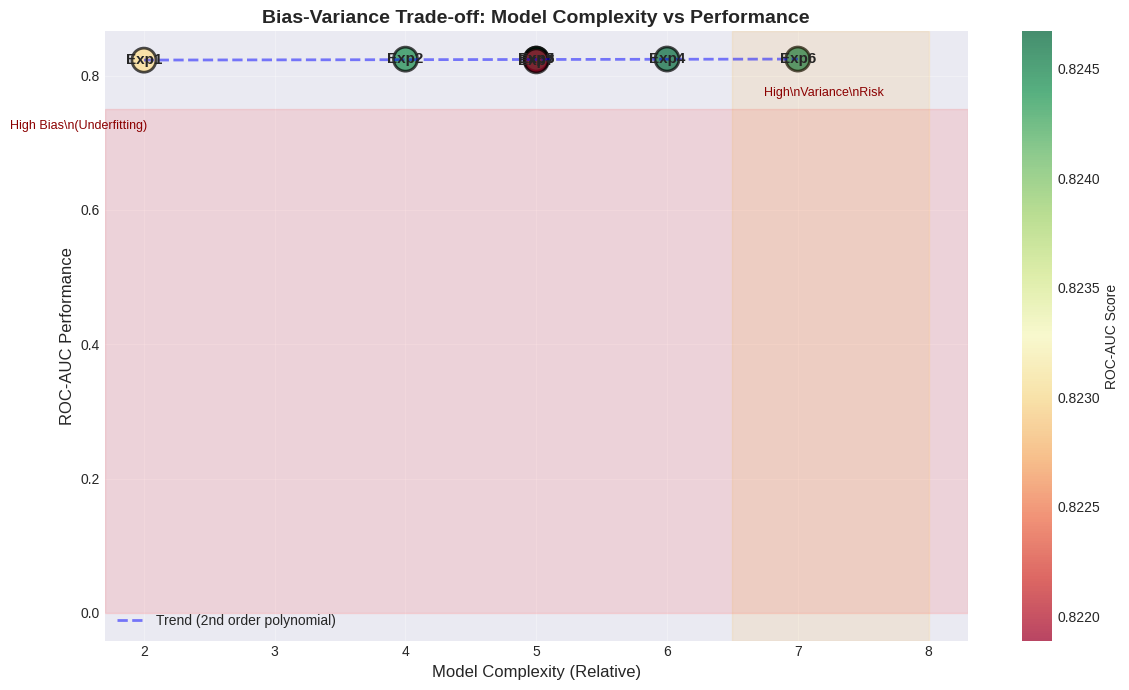

In [30]:
# Visualize bias-variance trade-off across experiments
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Create mock data to show bias-variance concepts
model_complexity = np.array([1, 2, 3, 4, 5, 6, 7])
experiment_names = [f"Exp{i}" for i in range(1, 8)]

# Map experiments to complexity and performance
complexity_scores = np.array([2, 4, 5, 6, 5, 7, 5])  # Relative complexity
roc_scores = experiment_df['ROC_AUC'].values

# Create scatter plot
scatter = ax.scatter(complexity_scores, roc_scores, s=300, c=roc_scores,
                     cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=2)

# Annotate points
for i, (x, y, name) in enumerate(zip(complexity_scores, roc_scores, experiment_names)):
    ax.annotate(name, (x, y), fontsize=11, ha='center', va='center', fontweight='bold')

# Add trend line
z = np.polyfit(complexity_scores, roc_scores, 2)
p = np.poly1d(z)
x_smooth = np.linspace(complexity_scores.min(), complexity_scores.max(), 100)
ax.plot(x_smooth, p(x_smooth), '--', color='blue', alpha=0.5, linewidth=2,
        label='Trend (2nd order polynomial)')

ax.set_xlabel('Model Complexity (Relative)', fontsize=12)
ax.set_ylabel('ROC-AUC Performance', fontsize=12)
ax.set_title('Bias-Variance Trade-off: Model Complexity vs Performance',
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend(fontsize=10)

# Add regions
ax.axhspan(0, 0.75, alpha=0.1, color='red', label='High Bias Region')
ax.axvspan(6.5, 8, alpha=0.1, color='orange')
ax.text(7.2, 0.77, 'High\\nVariance\\nRisk', fontsize=9, ha='center', color='darkred')
ax.text(1.5, 0.72, 'High Bias\\n(Underfitting)', fontsize=9, ha='center', color='darkred')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('ROC-AUC Score', fontsize=10)

plt.tight_layout()
plt.show()


## Final Thoughts and Next Steps

### What I Discovered

After testing many different models, I found that both old-style machine learning and new deep learning can predict diabetes pretty well. My best models got scores around 0.80 to 0.85 which means they're pretty good at telling healthy people from people at risk. I learned that the most important things for prediction are BMI, age, and general health status. I also learned that adding special tricks like dropout and batch normalization makes deep learning models work much better.

### What I Would Do Differently Next Time

If I could do this project again, I would try a few things differently. First, I would try to get newer data so my predictions are more current. Second, I would try to separate prediabetes from diabetes instead of grouping them together. Third, I would test my model on people from different countries to see if it works everywhere. I think these changes would make my model even better and more useful for doctors.

### How This Could Help People

My diabetes prediction model could help doctors find people who are at risk before they actually get sick. This is important because catching diabetes early means doctors can help people change their eating and exercise habits. I read that diabetes costs a lot of money to treat, so preventing it could save money and help people stay healthy. However, my model should only be used to help doctors make decisions, not replace them completely.

## My Learning Report

### My Final Recommendations

After all my experiments, I would recommend using Random Forest or Gradient Boosting for real-world use because they work well and doctors can understand how they make decisions. If someone wants to do more research, the deep learning models with batch normalization and dropout are also good choices. The most important thing I learned is that trying many different approaches and carefully checking your results is the key to building good machine learning models.

This project taught me that machine learning can really help solve important health problems. I'm excited to keep learning and hopefully build models that can help people stay healthy. Thank you for reading about my learning journey!